<a href="https://colab.research.google.com/github/albertomarin12/Simulac-n-matem-tica/blob/main/Correci%C3%B3n_Examen3_Mar%C3%ADnAlberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 2 - Montecarlo - 3.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

- $\frac {1}{\ b - a}\int_{a}^{b} {f(x)}\text{d}x$.

In [7]:
import numpy as np

def montecarlo(f, N, a, b) :
    u = np.random.uniform(a, b, N)
    return np.mean(f(u)*(b-a))


2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [8]:
import numpy as np
import sympy as sp
def f1(x):
    return (np.log(2+ np.sin(2*x**2)))/(x*np.exp(-x**3))

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

In [9]:
import numpy as np
import pandas as pd

N= np.logspace(1,6,6) # para 10,100,1000, 10000, 100000, 1000000

table= pd.DataFrame(columns=["Aproximación f1(x)","Aproximación f2(x)","Aproximación f3(x)","Aproximación f4(x)","Aproximación f5(x)"], index=N)
table

,Aproximación f1(x),Aproximación f2(x),Aproximación f3(x),Aproximación f4(x),Aproximación f5(x)
10.0,NaN,NaN,NaN,NaN,NaN
100.0,NaN,NaN,NaN,NaN,NaN
1000.0,NaN,NaN,NaN,NaN,NaN
10000.0,NaN,NaN,NaN,NaN,NaN
100000.0,NaN,NaN,NaN,NaN,NaN
1000000.0,NaN,NaN,NaN,NaN,NaN


In [10]:


for i in N :
    
    aprox1 = montecarlo(f1,int(i),0.1,0.3)
    table.loc[i,"Aproximación f1(x)"] =  aprox1
    
    aprox2 = montecarlo(f1,int(i),0.3,0.5)
    table.loc[i,"Aproximación f2(x)"] =  aprox2
    
    aprox3 = montecarlo(f1,int(i),0.5,0.7)
    table.loc[i,"Aproximación f3(x)"] = aprox3
    
    aprox4= montecarlo(f1,int(i),0.7,0.9)
    table.loc[i,"Aproximación f4(x)"] = aprox4
    
    aprox5= montecarlo(f1,int(i),0.9,1.1)
    table.loc[i,"Aproximación f5(x)"] = aprox5
    
    
table

,Aproximación f1(x),Aproximación f2(x),Aproximación f3(x),Aproximación f4(x),Aproximación f5(x)
10.0,0.807915,0.446349,0.409095,0.464179,0.609093
100.0,0.791529,0.454019,0.407815,0.455147,0.584964
1000.0,0.810226,0.455577,0.408104,0.457059,0.584593
10000.0,0.808152,0.455525,0.408088,0.455511,0.583749
100000.0,0.806865,0.455404,0.40814,0.455686,0.583709
1000000.0,0.806769,0.455497,0.408142,0.455741,0.583728


4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

In [11]:
y_01 = 0.1
y_03 = y_01 + 0.806789
y_05 = y_03 + 0.455585
y_07 = y_05 + 0.408145
y_09 = y_07 + 0.455741
y_11 = y_09 + 0.583674

---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

## Código incorrecto

### No tuve tiempo para hacer este código y solamente pegué la función para definir una función. La función que esta ahi es de otro ejercicio.

In [12]:
import numpy as np
import sympy as sp
def f(x) :
    return (x-2)**2 + 1
    
    sp.diff(f,x)
print(f)

<function f at 0x7f73cc5c6560>


## Código correcto

### Definí la función correcta

In [13]:
def f(x,y):
    return np.exp(-0.05*(x**2+y**2))*np.sin(x**2+y**2) > 0.5
   


2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

## No existe corrección porque no logré hacer nada de este código sin embargo este es el código correcto. 

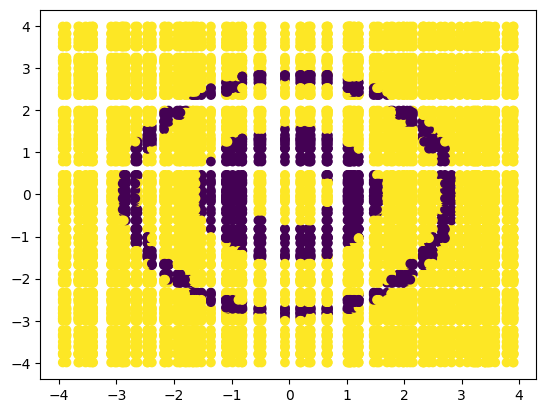

In [14]:
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.uniform(-4, 4, 100)
y = np.random.uniform(-4, 4, 100)

X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c =~ f(X,Y))

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [15]:
def montecarlo_general (region,ax,bx,ay,by,N):
    x = np.random.uniform( ax, bx ,N)
    y = np.random.uniform( ax, bx ,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

In [16]:
montecarlo_general(f, -4,4,-4,4,1000)

10.432

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [17]:

N= [10000, 100000, 1000000] 


table= pd.DataFrame(columns=["Aproximación f(x)", "Error"], index=N)
table

,Aproximación f(x),Error
10000,NaN,NaN
100000,NaN,NaN
1000000,NaN,NaN


In [21]:
ax = -4
bx = 4
ay = -4
by = 4
AR = (bx-ax)*(by-ay)

for i in N : 
    AD = montecarlo_general(f, ax, bx, ay, by, int(i))
    Crel = np.sqrt( (1 - AD/AR)/(AD/AR) )
    Error = np.log10(Crel) - np.log10(i)/2
    table.loc[i,"Aproximación f(x)"] =  AD
    table.loc[i,"Error"] = Error
table

,Aproximación f(x),Error
10000,10.8736,-1.655531
100000,10.92928,-2.156868
1000000,10.915392,-2.656535


## Código incorrecto

### El error fue intentar darles valores a pi cuando no lo necesitaba e intentar tenerlo exactamente como el código que hicimos en clase. También no tuve tiempo de graficarlo en 3D y creo que no valia la pena porque la gráfica en 2D estaba mal.

---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [22]:
import numpy as np
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['ai', 'bi' ,'ci', 'di', 'ei', 'fi', 'pi'], dtype='float')
df.index.name = "$i$"


A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

In [23]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['ai', 'bi' ,'ci', 'di', 'ei', 'fi', 'pi'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0,0.85,0.2,-0.2]
df['bi'] = [0,0,-0.2,0.2]
df['ci'] = [0,0,0,0]
df['di'] = [0,0,0.2,0.2]
df['ei'] = [0.18,0.85,0.2,0.2]
df['fi'] = [0,0.1,0,0]
df['gi'] = [0,0,0,0]
df['hi'] = [0,-0.1,0,0]
df['ii'] = [0,0.85,0.3,0.3]
df['ji'] = [0,0,0,0]
df['ki'] = [0,1.6,0.8,0.8]
df['pi'] = [0,0,0,0]


df.round(2)

,ai,bi,ci,di,ei,fi,pi,gi,hi,ii,ji,ki
$i$,,,,,,,,,,,,
0,0.00,0.0,0,0.0,0.18,0.0,0,0,0.0,0.00,0,0.0
1,0.85,0.0,0,0.0,0.85,0.1,0,0,-0.1,0.85,0,1.6
2,0.20,-0.2,0,0.2,0.20,0.0,0,0,0.0,0.30,0,0.8
3,-0.20,0.2,0,0.2,0.20,0.0,0,0,0.0,0.30,0,0.8


In [24]:
import random
random.seed(0)

A0 = np.array([[0.5,0],
               [0, 0.5]])
b0 = np.array([1.0, 1.0])

A1 = np.array([[0.5, 0],
               [0, 0.5]])
b1 = np.array([50, 1])

A2 = np.array([[0.5, 0],
               [0, 0.5]])
b2 = np.array([1, 50])

A3 = np.array([[0.5, 0],
               [0, 0.5]])
b3 = np.array([50, 50])


In [25]:
from pandas.core.internals.blocks import F
import random
random.seed(0)

x = [0]
y = [0]

N = 10000

for k in range (N):
  i_actual = random.choices(i, df["pi"])
  
  a = float(df["ai"][i_actual]) 
  b = float(df["bi"][i_actual]) 
  c = float(df["ci"][i_actual]) 
  d = float(df["di"][i_actual]) 
  e = float(df["ei"][i_actual]) 
  f = float(df["fi"][i_actual]) 

  xkm1 = a*x[-1] + b*y[-1] + e
  ykm1 = c*x[-1] + d*y[-1] + f

  x.append(xkm1)
  y.append(ykm1)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,10))
plt.scatter(x,y, s=1, c="g")

## Código correcto

### agregé un x=np.array([0,0,0]) para indicar que las coordenadas x y z empiezan en cero. Después cree tres listas para guardar los valores de x y z dada por la función de random.choices. Después agregué un for k in range (N) donde N= 1000 para indicar la cantidad de veces que va hacer el proceso de random y la multiplicación de matrices.

In [26]:
import numpy as np
import random



A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

# Vector inicial x
x = np.array([0,0,0])

# Listas para almacenar las coordenadas de x en cada iteración del bucle for
x_historial = [0]
y_historial = [0]
z_historial = [0]

# Número de iteraciones que se realizarán en el bucle for
N = 1000

# Listas con las matrices A y vectores b
A_lista = [A0,A1,A2,A3]
b_lista = [b0,b1,b2,b3]

# Lista con los índices de las matrices A y vectores b
i = [0,1,2,3]

# Bucle for para calcular las coordenadas de x en cada iteración y almacenarlas en las listas correspondientes
for k in range(N):
    i_actual = random.choices(i)[0]
    
    A = A_lista[i_actual]
    b = b_lista[i_actual]
    
    x = A @ x + b
    
    x_historial.append(x[0])
    y_historial.append(x[1])
    z_historial.append(x[2])



Se lleva a cabo un bucle for que realiza N iteraciones. En cada iteración, se selecciona aleatoriamente un índice de la lista i. A continuación, se seleccionan las matrices A y los vectores b correspondientes al índice seleccionado, y se lleva a cabo la operación A@x+b, que equivale a la multiplicación matricial de la matriz A por el vector x y la suma del vector b. El resultado se almacena en el vector x. Después se añade cada componente del vector x a su correspondiente lista x_historial, y_historial, z_historial.

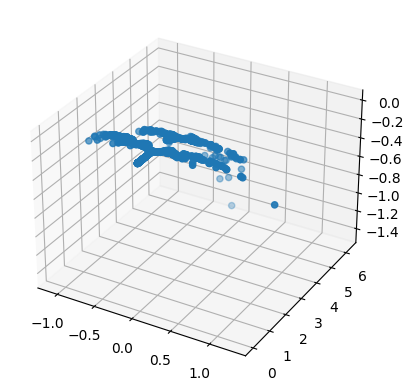

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Graficar las trayectorias en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_historial, y_historial, z_historial)
plt.show()


## Correción 

### Este código en general esta bien, solamente el punto donde pide modificar la función sim_r para que en lugar de pasarle el inicio y periodos puedas pasarle fecha de inicio y fin. Por lo tanto solo vamos a modificar ese código.

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Mercado Libre** o **Netflix**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 5 de noviembre del 2022.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [28]:
# Instalación del paquete
!pip install yfinance

# conda install pandas-datareader
# pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)["Adj Close"]


2. Obtenga los precios de cierre ajustados para Netflix y Mercado Libre desde el 5 de noviembre de 2020 al 5 de noviembre de 2022.

In [31]:
ticker = "NFLX","MELI"
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2020-11-05" #inicio de datos
final = "2022-11-05" #final de datos
fecha = "2022-11-06" # Primer dato a simular
ffinal = "2023-02-10" #ultimo dato a simular
per = 365 # Datos futuros a simular
data = getClose(ticker,inicio,final)
#data_aapl.plot.hist()

[*********************100%***********************]  2 of 2 completed


In [32]:
data

,MELI,NFLX
Date,,
2020-11-05,1437.800049,513.760010
2020-11-06,1485.859985,514.729980
2020-11-09,1330.719971,470.500000
2020-11-10,1226.030029,480.239990
2020-11-11,1304.489990,490.760010
...,...,...
2022-10-31,901.619995,291.880005
2022-11-01,919.340027,286.750000
2022-11-02,851.280029,273.000000


3. Calcule el rendimiento **simple** para ambas empresas.

In [33]:
N = (data["NFLX"] - data["NFLX"].shift())/data["NFLX"].shift()
M = (data["MELI"] - data["MELI"].shift())/data["MELI"].shift()

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

## Código incorrecto

### como no sabia como calcular la cantidad de días entre dos fechas, lo que hice fue buscar datos de close entre esas fechas y contar la cantidad de datos en el dataframe. Y seguí usando la misma función de antes. 

In [34]:
periodos = 1257 # Cantidad en dias de simulaciones

fecha = "2022-11-05" # Primer dato a simular
fecha_final = "2023-02-10" #ultimo dato a simular


In [35]:

datal = getClose(ticker,fecha,fecha_final)

[*********************100%***********************]  2 of 2 completed


In [36]:
datal

,MELI,NFLX
Date,,
2022-11-07,940.780029,258.600006
2022-11-08,937.080017,263.459991
2022-11-09,897.619995,254.660004
2022-11-10,935.530029,274.970001
2022-11-11,974.890015,290.130005
...,...,...
2023-02-03,1187.250000,365.899994
2023-02-06,1175.439941,361.480011
2023-02-07,1173.810059,362.950012


In [37]:
per = len(datal["NFLX"]) + 32
per

97

In [38]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)

## Código correcto

### En el código pd.date_range cambie las variables inicio,periodos por inicio y fin. Para que el código     return pd.DataFrame(index=fechas, data=r) devuelva un dataframe de todas las fechas que existen entre las dos fechas seleccionadas.

In [39]:
def sim_r(media,std,inicio,final,N):
    #Se define la función sim_r con cinco argumentos: media, std, inicio, final y N.

    r= np.random.normal(media,std,size=(len(pd.date_range(inicio, final)), N))
    #Se utiliza la función np.random.normal de NumPy para generar una matriz de datos aleatorios con la media y la desviación estándar especificadas en media y std, respectivamente.
    #La matriz de datos se genera con la función np.random.normal utilizando el tamaño (len(pd.date_range(inicio, final)), N), que representa el número de fechas en el rango especificado y el número de simulaciones N.
    fechas= pd.date_range(fecha,ffinal)
    #Se crea un objeto DatetimeIndex de pandas utilizando la función pd.date_range con el rango de fechas especificado por inicio y final.
    return pd.DataFrame(index=fechas, data=r)
    #e devuelve un objeto DataFrame de pandas con la matriz de datos aleatorios r y el índice de fechas fechas.

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 5 de noviembre de 2022 al 10 de febrero de 2023.

In [40]:
R_nflx_mean = N.mean()
R_nflx_std = N.std()

R_meli_mean = M.mean()
R_meli_std = M.std()


In [41]:

r_nflx_simulados = sim_r(R_nflx_mean, R_nflx_std, fecha, ffinal, 100000)
r_nflx_simulados



,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,0.062653,-0.004506,-0.023276,-0.003063,0.015530,-0.028454,-0.012985,0.000012,0.038858,0.025078,...,0.000807,0.016170,0.022684,-0.039960,-0.021931,0.065030,0.040947,0.003118,0.013844,-0.015546
2022-11-06,0.001222,-0.046999,0.008028,0.002683,0.029227,0.046039,-0.045056,0.035158,-0.053835,-0.046912,...,-0.015594,0.001962,-0.049014,0.021722,0.021854,0.030723,0.018352,0.035719,0.009854,0.060412
2022-11-07,-0.025495,-0.057237,0.026083,-0.056338,-0.021297,-0.031291,0.004236,-0.041707,0.040176,-0.053160,...,0.000760,-0.033674,0.007948,0.037696,-0.008752,-0.050774,0.043684,-0.013791,-0.014934,0.011217
2022-11-08,-0.018317,0.029880,-0.047004,0.016786,-0.005583,-0.001686,-0.057476,-0.041404,0.034841,0.027699,...,0.020296,-0.049042,-0.047684,-0.033678,0.024075,-0.020834,0.037850,0.073193,-0.002146,0.007265
2022-11-09,-0.045427,0.035540,-0.010171,0.006403,-0.035382,-0.045371,-0.087518,0.021986,0.050911,-0.009197,...,0.032119,0.061215,0.068595,-0.068842,-0.045664,0.011203,0.044244,-0.031049,-0.014488,0.003862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,0.016453,-0.025242,-0.033599,-0.014752,-0.003631,-0.030237,-0.033048,-0.043369,0.007839,0.026242,...,0.002538,0.034574,0.052846,0.009062,0.009820,0.027836,-0.034020,0.041359,0.002689,0.000563
2023-02-07,-0.041407,0.052289,0.048803,-0.011136,-0.024035,-0.037237,0.020319,0.003679,0.075196,0.006330,...,0.047270,0.017019,0.047676,-0.055802,-0.052299,0.029605,-0.018066,-0.004531,0.003204,-0.007711
2023-02-08,-0.039163,-0.010740,-0.029982,0.029688,-0.015864,-0.014450,0.044422,-0.006070,0.028630,-0.009034,...,-0.000223,-0.030062,-0.024321,-0.044708,0.004527,0.035725,-0.041919,-0.002066,-0.001837,-0.036458
2023-02-09,-0.013208,-0.032803,-0.012250,0.001199,0.018484,-0.022905,0.007788,-0.017986,0.020717,0.036908,...,-0.056390,-0.013994,-0.024082,0.018937,-0.064683,0.010946,-0.003704,-0.008917,-0.004110,-0.055210


In [42]:

r_meli_simulados = sim_r(R_meli_mean, R_meli_std, fecha, ffinal, 100000)
r_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,0.085522,-0.002661,0.000413,0.014698,-0.022591,-0.043880,-0.010079,-0.056503,0.014576,0.048896,...,0.142630,-0.001639,-0.043396,-0.006725,-0.018874,-0.038792,0.016731,0.049088,0.010942,0.023785
2022-11-06,-0.085132,-0.009052,0.042858,-0.006545,0.047624,0.046035,0.059916,-0.110373,0.026029,-0.006496,...,-0.003191,0.012057,-0.014874,-0.060309,-0.022915,-0.022091,0.008128,-0.014441,-0.040114,0.055131
2022-11-07,-0.021799,-0.000545,-0.043686,-0.031356,-0.085430,0.046586,0.009630,-0.012075,0.015701,0.031635,...,-0.004681,0.032698,0.023502,-0.052935,0.032257,-0.052750,-0.048442,0.045108,0.024188,-0.018912
2022-11-08,0.015764,0.000735,0.082624,-0.094381,0.027566,-0.082077,0.054279,0.022754,0.045466,-0.084176,...,0.056539,-0.026854,-0.024352,-0.016686,-0.040642,0.026219,-0.071101,-0.029976,0.003491,-0.053153
2022-11-09,-0.026906,0.005240,0.015722,-0.103882,0.071664,-0.014934,-0.029152,-0.059558,0.003563,-0.020045,...,-0.019570,0.055078,0.036829,0.000099,0.040785,0.030675,0.028025,-0.035281,-0.048443,-0.027068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,-0.042005,-0.049998,0.049236,-0.013328,0.025884,0.012495,0.000551,0.015235,-0.006814,0.041823,...,0.038817,-0.032949,-0.039933,-0.034685,0.100733,-0.023679,0.035570,0.014890,0.012269,0.002481
2023-02-07,0.042534,-0.051737,-0.045902,0.005502,-0.028359,0.001725,-0.044966,-0.022885,-0.051426,0.044842,...,-0.114700,-0.046984,-0.025630,-0.065385,-0.029149,-0.014231,0.000678,-0.000969,-0.013537,-0.039467
2023-02-08,0.026497,0.053755,-0.017910,-0.018282,0.061291,-0.073948,-0.046034,0.057550,0.014101,0.068661,...,0.005761,0.040411,-0.041625,-0.011401,0.002770,0.002696,0.043583,-0.069072,-0.024195,-0.015189
2023-02-09,0.051233,0.044709,0.039742,0.010596,0.013212,0.049146,0.008532,-0.045623,0.015053,0.029619,...,0.006777,-0.071404,0.040971,-0.046485,0.036533,0.082947,-0.002430,0.046137,0.029033,0.006243


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [43]:
precios_meli_simulados = (r_meli_simulados + 1).cumprod()*data["MELI"][-1] # r_simulados son cumprod es producto acumulado
precios_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,1018.838455,936.072759,938.957499,952.365255,917.366762,897.385851,929.110384,885.538267,952.250563,984.462091,...,1072.438715,937.031959,897.839604,932.258215,920.855018,902.160843,954.272797,984.642822,948.839875,960.893973
2022-11-06,932.102988,927.599138,979.199727,946.132161,961.055037,938.696807,984.778704,787.798871,977.036552,978.067086,...,1069.016120,948.330023,884.484894,876.034317,899.754033,882.230914,962.029289,970.423582,910.777685,1013.868987
2022-11-07,911.784113,927.093409,936.422420,916.465164,878.952580,982.426763,994.262582,778.286042,992.376931,1009.008329,...,1064.012224,979.338879,905.272396,829.661144,928.777150,835.693356,915.426658,1014.197865,932.807144,994.694673
2022-11-08,926.157679,927.774453,1013.793604,829.967985,903.181518,901.792583,1048.230085,795.995468,1037.496590,924.073879,...,1124.170481,953.039229,883.226776,815.817054,891.030129,857.604294,850.339183,983.796465,936.063821,941.823628
2022-11-09,901.238853,932.635707,1029.732368,743.749352,967.907519,888.325603,1017.672008,748.587673,1041.193354,905.550535,...,1102.170933,1005.530892,915.755431,815.898074,927.371023,883.911633,874.170300,949.087347,890.717966,916.330592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,761.487112,509.084734,1361.480225,835.111826,1926.196232,523.882253,978.394830,763.661222,649.494163,759.487150,...,666.164765,1551.682177,730.987777,533.685324,1367.255128,757.730542,1102.442519,489.497760,1254.151297,935.951095
2023-02-07,793.876424,482.746193,1298.985726,839.706724,1871.570381,524.785872,934.400022,746.184743,616.093485,793.544383,...,589.755734,1478.777756,712.252754,498.790334,1327.401522,746.947424,1103.189437,489.023369,1237.173338,899.012365
2023-02-08,814.911870,508.696285,1275.721259,824.355139,1986.280285,485.978933,891.385900,789.127838,624.780735,848.029780,...,593.153468,1538.537147,682.605398,493.103735,1331.078401,748.961091,1151.269903,455.245469,1207.239959,885.357021
2023-02-09,856.662053,531.439571,1326.420502,833.089640,2012.523799,509.862894,898.991378,753.125616,634.185387,873.147649,...,597.173522,1428.679292,710.572536,470.182047,1379.706315,811.084931,1148.471747,476.249084,1242.289500,890.884721


In [44]:
precios_nflx_simulados = (r_nflx_simulados + 1).cumprod()*data["NFLX"][-1] # r_simulados son cumprod es producto acumulado
precios_nflx_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,277.129407,259.614771,254.719736,259.991183,264.840011,253.369532,257.403739,260.793069,270.923691,267.330189,...,261.000394,265.007074,266.705662,250.368963,255.070735,277.749192,271.468482,261.603259,264.400335,256.735897
2022-11-06,277.468030,247.413187,256.764568,260.688642,272.580573,265.034324,245.806246,269.961936,256.338535,254.789257,...,256.930471,265.527087,253.633393,255.807354,260.644981,286.282344,276.450344,270.947470,267.005801,272.245954
2022-11-07,270.394109,233.252080,263.461689,246.001965,266.775440,256.741206,246.847403,258.702659,266.637264,241.244753,...,257.125841,256.585657,255.649265,265.450297,258.363834,271.746607,288.526689,267.210864,263.018386,275.299844
2022-11-08,265.441332,240.221642,251.077881,250.131329,265.286123,256.308440,232.659520,247.991269,275.927116,247.926943,...,262.344397,244.002300,243.458878,256.510395,264.583819,266.085078,299.447472,286.768834,262.453844,277.299812
2022-11-09,253.383176,248.759183,248.524204,251.732997,255.899812,244.679571,212.297619,253.443685,289.974786,245.646660,...,270.770576,258.938921,260.158997,238.851598,252.501807,269.065971,312.696277,277.864857,258.651473,278.370721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,311.702593,183.476560,265.726410,184.075716,310.485227,168.621564,213.992088,279.038468,278.439805,166.475458,...,162.545867,233.273503,169.835482,162.243231,348.103116,265.259573,595.338322,324.008364,300.259573,218.633749
2023-02-07,298.795976,193.070454,278.694591,182.025769,303.022599,162.342660,218.340180,280.065106,299.377374,167.529182,...,170.229385,237.243574,177.932519,153.189783,329.897680,273.112664,584.583209,322.540420,301.221607,216.947888
2023-02-08,287.094284,190.996937,270.338880,187.429715,298.215521,159.996821,228.039282,278.365040,307.948537,166.015710,...,170.191422,230.111641,173.605074,146.340964,331.391199,282.869749,560.077831,321.874182,300.668310,209.038309
2023-02-09,283.302332,184.731584,267.027130,187.654353,303.727721,156.332173,229.815340,273.358437,314.328366,172.143035,...,160.594355,226.891521,169.424254,149.112287,309.955816,285.966063,558.003131,319.004055,299.432612,197.497341


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

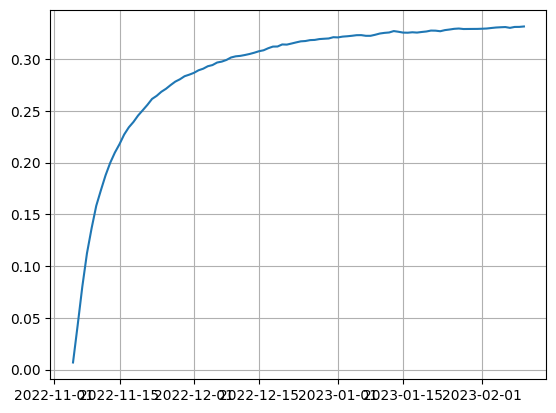

In [45]:
valor_deseado = data["MELI"][-1]*1.10
#data_aapl[-1]*1.10
probabilidad = (precios_meli_simulados >= valor_deseado).mean(axis=1)
plt.figure()
plt.plot(probabilidad)
plt.grid()

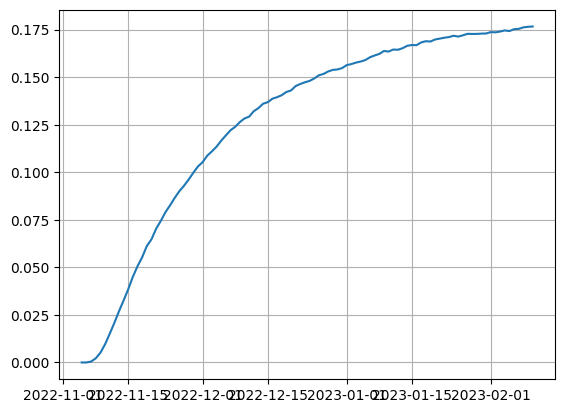

In [46]:
valor_deseado = data["NFLX"][-1]*1.20
#data_aapl[-1]*1.10
probabilidad = (precios_nflx_simulados >= valor_deseado).mean(axis=1)
plt.figure()
plt.plot(probabilidad)
plt.grid()

#### Extra <font size='1'>(10 puntos)</font>

Utiliza el rendimiento logarítimico y compara los resultados.

In [47]:
nflx = precios_nflx_simulados.mean(axis=1)
meli = precios_meli_simulados.mean(axis=1)



In [48]:
r = np.log(data["NFLX"]/data["NFLX"].shift())
R = np.log(data["MELI"]/data["MELI"].shift())

R_nflx_mean = r.mean()
R_nflx_std = r.std()

R_meli_mean = R.mean()
R_meli_std = R.std()


In [49]:
r_nflx_simulados = sim_r(R_nflx_mean, R_nflx_std, fecha, ffinal, 100000)
r_nflx_simulados


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,0.056374,0.012114,-0.031872,0.046272,0.033860,0.003431,0.030225,0.000165,-0.015674,-0.033649,...,-0.031554,-0.068996,0.044299,0.072295,-0.007087,-0.044178,-0.025823,-0.064091,-0.061191,-0.001905
2022-11-06,0.007892,0.037767,-0.010019,-0.022613,-0.018963,-0.012314,-0.028849,0.056965,0.003454,0.051128,...,-0.013603,0.040062,-0.001874,-0.036392,-0.001068,-0.038922,0.021458,-0.035861,-0.013263,0.038355
2022-11-07,-0.009165,-0.059668,-0.047912,0.040187,-0.052834,0.025664,0.008984,-0.014187,0.010497,0.006447,...,0.044163,-0.070776,0.039896,0.045899,-0.035248,0.016000,0.060537,0.007280,0.006234,0.012660
2022-11-08,0.018082,0.017106,0.019975,0.018193,0.022456,0.011439,-0.035757,0.038784,0.080203,0.087482,...,-0.037831,0.006178,0.022549,-0.000122,0.007633,0.026024,-0.023344,-0.003945,-0.007481,-0.000612
2022-11-09,0.027413,-0.021411,0.021544,0.029573,0.015223,-0.006628,0.027861,-0.011547,0.028820,-0.064894,...,-0.008457,0.005952,0.046169,0.033527,-0.003262,0.004039,0.011113,0.047207,0.012459,0.014892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,-0.050867,0.013758,0.011476,-0.095778,-0.020259,0.026968,-0.033176,0.001634,0.004912,0.031599,...,-0.036261,0.015201,-0.039940,-0.016696,0.033356,0.007502,-0.023213,0.001508,0.097744,-0.019104
2023-02-07,0.053712,-0.001817,-0.009703,-0.009436,-0.022355,-0.062049,0.007519,0.040890,-0.010080,0.009618,...,-0.007807,0.038808,-0.003917,-0.012569,-0.072027,0.023976,-0.076528,0.062436,0.019518,0.008105
2023-02-08,0.024620,-0.042793,-0.025901,-0.030455,0.014029,0.015205,-0.002313,-0.029750,-0.063229,-0.003121,...,-0.026194,-0.025328,0.003645,-0.002076,0.010692,0.028789,-0.023271,0.008112,0.020028,0.000818
2023-02-09,-0.029767,0.035580,-0.004007,0.065936,0.002396,-0.042126,-0.027506,-0.032817,-0.042151,0.028316,...,0.008034,0.048545,0.011802,0.046936,0.036430,0.036377,-0.043047,-0.000674,0.087649,0.005875


In [50]:
r_meli_simulados = sim_r(R_meli_mean, R_meli_std, fecha, ffinal, 100000)
r_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,-0.021185,0.023852,0.033607,0.024990,-0.066626,-0.001783,-0.012451,-0.074321,-0.002724,-0.034771,...,0.013705,-0.037300,-0.015531,0.020548,0.027375,-0.049000,-0.018793,0.023615,0.005072,0.004357
2022-11-06,0.008605,-0.047184,0.016409,0.033820,-0.040977,0.019440,-0.032523,-0.007874,-0.029786,0.047467,...,-0.016014,0.019532,-0.057377,0.026073,0.082526,-0.032883,0.004347,0.018452,-0.074521,0.070903
2022-11-07,-0.018691,0.039896,-0.005245,0.051933,-0.014154,-0.001205,0.001747,0.008766,-0.018033,-0.033945,...,-0.015127,-0.021262,-0.013927,-0.008862,0.096843,-0.026967,0.069173,0.104955,-0.049524,0.060860
2022-11-08,-0.050123,-0.009086,0.035721,-0.006215,0.007502,0.081126,-0.034114,-0.066713,0.059631,0.008372,...,-0.078680,0.086380,0.047997,0.012285,-0.022061,-0.007156,-0.052321,-0.019728,-0.096028,0.005673
2022-11-09,-0.023147,0.025974,0.030133,0.115388,0.053524,-0.007590,0.018543,0.051018,0.021171,-0.038663,...,0.067937,0.018392,0.025898,0.010794,-0.010388,-0.014651,0.054514,0.001165,-0.037932,-0.021892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,0.002350,0.002075,-0.033220,-0.030784,-0.060421,0.003605,0.014143,-0.059014,0.017810,0.056737,...,0.024941,0.004514,0.047799,0.064854,-0.051407,0.011105,-0.033940,-0.001320,0.090124,0.036441
2023-02-07,0.063746,0.036807,-0.045800,0.073287,-0.019835,-0.010090,0.026115,0.064893,0.009029,-0.018365,...,0.035351,-0.059220,-0.016279,0.043452,0.035457,-0.092592,-0.050462,0.039675,-0.003562,0.018973
2023-02-08,0.007463,0.013960,0.053637,0.042907,0.005029,0.041342,0.005859,-0.010266,-0.055928,-0.021225,...,0.007616,0.069936,0.069920,-0.009821,-0.075062,-0.061042,0.017241,-0.017081,0.018461,0.021167
2023-02-09,0.021642,-0.128653,0.064038,0.010848,0.009972,0.018793,0.060044,-0.049078,-0.035603,-0.059406,...,0.071641,0.022010,0.008668,0.026089,-0.032963,-0.026581,0.002045,0.038594,0.049346,0.031950


In [51]:
precios_log_meli_simulados = (r_meli_simulados + 1).cumprod()*data["MELI"][-1] # r_simulados son cumprod es producto acumulado
precios_log_meli_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,918.686290,960.957245,970.112549,962.025032,876.036855,936.896574,926.884274,868.814777,936.013217,905.934681,...,951.433321,903.561739,923.993120,957.855987,964.263356,892.580326,920.931896,960.734629,943.329977,942.659117
2022-11-06,926.591389,915.615547,986.030874,994.560317,840.139146,955.109394,896.739089,861.973895,908.133560,948.936425,...,936.197268,921.210444,870.976857,982.829752,1043.839917,863.229920,924.935257,978.462043,873.032391,1009.496186
2022-11-07,909.272167,952.144829,980.859453,1046.211096,828.247977,953.958171,898.305441,869.530021,891.757041,916.724777,...,922.035746,901.623222,858.847181,974.120306,1144.928085,839.951166,988.916263,1081.156136,829.796416,1070.934394
2022-11-08,863.696274,943.493203,1015.896762,1039.708440,834.461722,1031.348696,867.660396,811.521342,944.933146,924.399758,...,849.489626,979.505341,900.069602,986.086917,1119.669989,833.940652,937.175286,1059.827213,750.112460,1077.009590
2022-11-09,843.704506,967.999086,1046.508385,1159.678474,879.125228,1023.521270,883.749451,852.923681,964.938391,888.659954,...,907.201326,997.519945,923.379591,996.730871,1108.038731,821.722336,988.264044,1061.061413,721.659315,1053.431971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,382.007047,725.305934,1266.465813,811.224674,620.589158,875.966990,542.987900,783.632232,478.128836,715.393826,...,676.463020,2650.486271,629.390590,543.398334,793.565061,695.697990,913.289879,1137.607685,1195.917518,627.361975
2023-02-07,406.358534,752.002158,1208.462248,870.677068,608.280076,867.128190,557.167855,834.484370,482.445959,702.255518,...,700.376575,2493.525150,619.144642,567.009876,821.702478,631.281830,867.203307,1182.742353,1191.657448,639.265055
2023-02-08,409.391142,762.500404,1273.280103,908.035322,611.339018,902.977398,560.432512,825.917592,455.463870,687.350432,...,705.710804,2667.912744,662.435043,561.441110,760.024111,592.747432,882.154809,1162.539408,1213.656132,652.796094
2023-02-09,418.251108,664.402274,1354.818281,917.885940,617.435405,919.946911,594.083161,785.383523,439.247886,646.517417,...,756.268483,2726.634568,668.177330,576.088624,734.971540,576.991568,883.958909,1207.406176,1273.544821,673.653037


In [52]:
precios_log_nflx_simulados = (r_nflx_simulados + 1).cumprod()*data["NFLX"][-1] # r_simulados son cumprod es producto acumulado
precios_log_nflx_simulados

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-11-05,275.491698,263.949097,252.478028,272.857240,269.620380,261.684681,268.672497,260.833160,256.702353,252.014725,...,252.561113,242.796571,272.342756,279.643747,258.941831,249.268910,254.055720,244.075715,244.832088,260.293161
2022-11-06,277.665985,273.917541,249.948502,266.687232,264.507690,258.462312,260.921486,275.691523,257.589101,264.899815,...,249.125519,252.523382,271.832354,269.466928,258.665350,239.566838,259.507329,235.323034,241.584805,270.276583
2022-11-07,275.121046,257.573325,237.973036,277.404491,250.532656,265.095484,263.265479,271.780212,260.292912,266.607527,...,260.127638,234.650800,282.677484,281.835230,249.547803,243.399833,275.217111,237.036149,243.090734,273.698266
2022-11-08,280.095772,261.979461,242.726624,282.451404,256.158730,268.127817,253.851973,282.321034,281.169097,289.930838,...,250.286706,236.100410,289.051600,281.800883,251.452678,249.734081,268.792383,236.101159,241.272188,273.530703
2022-11-09,287.773971,256.370349,247.955948,290.804273,260.058349,266.350581,260.924599,279.061174,289.272305,271.116162,...,248.170070,237.505580,302.396910,291.248831,250.632456,250.742673,271.779516,247.246752,244.278224,277.604162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,238.840357,238.955221,196.844438,296.197690,125.006591,217.585409,146.840513,312.357663,320.320166,183.841868,...,335.764378,380.564191,194.431992,216.570422,275.654671,143.269414,183.001020,135.864612,176.865360,123.769351
2023-02-07,251.668937,238.521053,194.934430,293.402894,122.212111,204.084517,147.944555,325.129837,317.091303,185.610129,...,333.143069,395.333010,193.670410,213.848338,255.800163,146.704472,168.996388,144.347401,180.317491,124.772479
2023-02-08,257.864982,228.314004,189.885440,284.467310,123.926584,207.187710,147.602398,315.457375,297.041905,185.030752,...,324.416572,385.320033,194.376389,213.404408,258.535219,150.927974,165.063724,145.518300,183.928952,124.874554
2023-02-09,250.189159,236.437302,189.124596,303.224064,124.223545,198.459670,143.542397,305.104863,284.521317,190.270004,...,327.022883,404.025202,196.670470,223.420664,267.953678,156.418336,157.958259,145.420293,200.050229,125.608214


[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

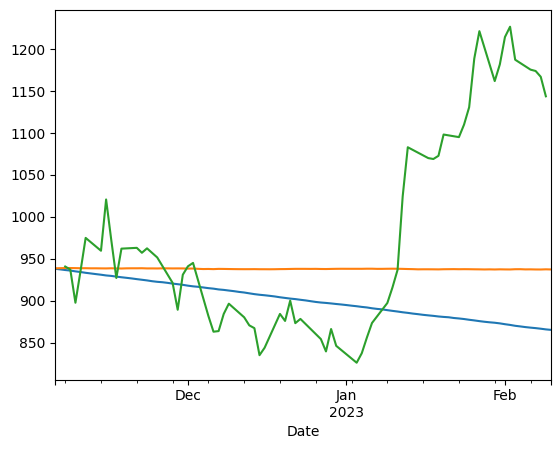

In [53]:
precios_log_meli_simulados.mean(axis=1).plot()
precios_meli_simulados.mean(axis=1).plot()
data = getClose(ticker,fecha,ffinal)
data['MELI'].plot()


[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

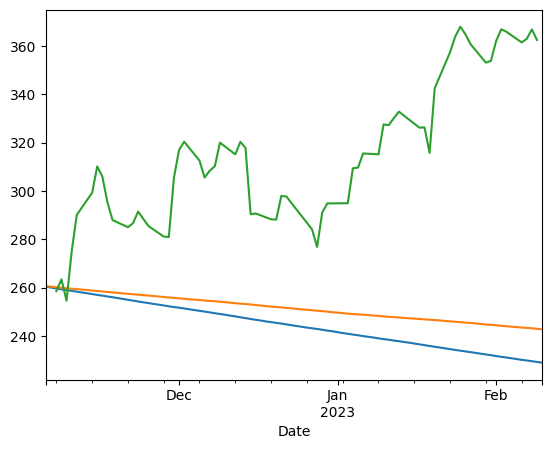

In [54]:
precios_log_nflx_simulados.mean(axis=1).plot()
precios_nflx_simulados.mean(axis=1).plot()
data = getClose(ticker,fecha,ffinal)
data['NFLX'].plot()
